### Desarrollo

### Análisis Exploratorio de Datos con Python y Creación de un Modelo de Predicción

En este ejercicio usando las librerias de Python se realiza un análisis exploratorio de datos para el conjunto de datos U3_train.csv, el cual contiene información sobre viviendas en California, EUA. Posteriormente se entrena un modelo de predicción de precios utilizando un árbol de decisión con el archivo U3_test.csv.



### 1. Crear un Jupyter Notebook 

Se creó un archivo Jupyter Notebook llamado **A4_MLI.ipynb**, el cual está incluido dentro de una carpeta comprimida. Esta carpeta puede descargarse desde el siguiente enlace:

**https://github.com/mlislas/ANALISIS_DATOS_MASIVOS/blob/main/A4_MLI.zip**


### 2. Importar las librerías necesarias.
Se importan las librerías necesarias para realizar análisis, visualización y modelado (pandas, numpy, matplotlib, seaborn y scikit-learn).

In [90]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


In [91]:
# Configuración estética de los gráficos 
sns.set(style="whitegrid") 
plt.rcParams["figure.figsize"] = (8, 6)

### 3. Importar el conjunto de datos (U3_train.csv).
Se carga el dataset de entrenamiento.

In [92]:
# Nota: El archivo U3_train.csv debe estar en la misma carpeta del notebook.
df = pd.read_csv("U3_train.csv")

### 4. Obtener las características generales del conjunto de datos.
El siguiente bloque de código realiza una inspección general del conjunto de datos con el propósito de comprender su estructura, tipos de variables y características estadísticas básicas. Esta revisión inicial es fundamental dentro del análisis exploratorio, ya que permite identificar posibles inconsistencias, valores faltantes y la distribución general de la información.

In [93]:
print("Primeras filas del conjunto de datos:") 
display(df.head()) 
print("\nInformación general del dataset:") 
df.info() 
print("\nEstadísticas descriptivas:") 
display(df.describe())



Primeras filas del conjunto de datos:


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    146

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

### 5. Crear una gráfica del precio de venta de las viviendas.

El siguiente código de Python utiliza las librerías matplotlib.pyplot (plt) y seaborn (sns) para generar y mostrar un histograma de la variable SalePrice (Precio de Venta) de un conjunto de datos (df). 

**Descripción de la Gráfica:** La gráfica indica que el precio típico de una vivienda es relativamente bajo, pero la distribución de precios se ve fuertemente influenciada por la existencia de un pequeño número de propiedades de alto valor (lujo).
* Precio de Venta (SalePrice). Muestra el rango de precios de las viviendas (aproximadamente desde 0 hasta más de 700,000).
* Densidad. Muestra la frecuencia o qué tan comunes son los precios dentro de cada rango (barra).



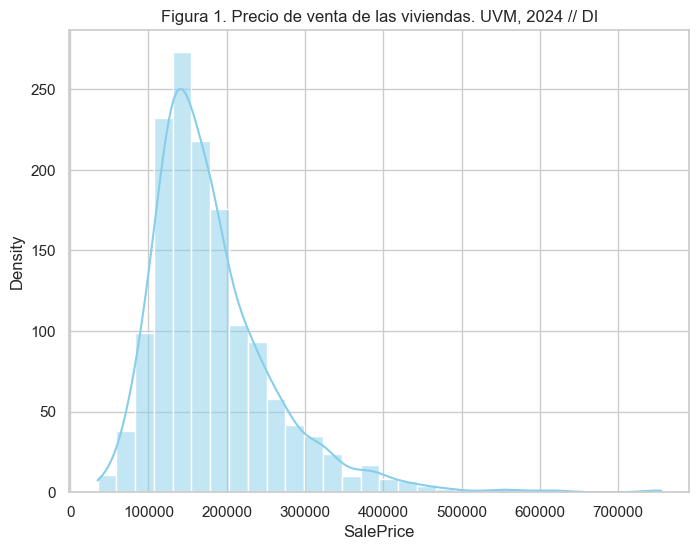

In [94]:
plt.figure(figsize=(8,6)) 
sns.histplot(df["SalePrice"], kde=True, bins=30, color="skyblue") 
plt.title("Figura 1. Precio de venta de las viviendas. UVM, 2024 // DI") 
plt.xlabel("SalePrice") 
plt.ylabel("Density") 
plt.show()


### 6. Identificar si la distribución de los datos del precio de las viviendas es uniforme o existe algún sesgo usando el método skew.
Un valor de skew positivo indica una distribución sesgada a la derecha; negativo indica sesgo a la izquierda.

In [79]:
skew_value = df["SalePrice"].skew() 
print("Coeficiente de asimetría (skew) del precio de venta: {skew_value:.2f}") 
if skew_value > 0: 
    print("➡ La distribución está sesgada hacia la derecha (valores altos).") 
elif skew_value < 0: 
    print("➡ La distribución está sesgada hacia la izquierda (valores bajos).") 
else: 
    print("➡ La distribución es aproximadamente simétrica.")

Coeficiente de asimetría (skew) del precio de venta: {skew_value:.2f}
➡ La distribución está sesgada hacia la derecha (valores altos).


### 7. Analizar la relación entre el precio de la vivienda (SalePrice) y el área de la vivienda (GrLivArea) a través de una gráfica de dispersión (skatter).

Este código permite visualizar la relación entre dos variables del conjunto de datos df: el área habitable de la vivienda (GrLivArea) en el eje X y el precio de venta (SalePrice) en el eje Y. Se utilizan las librerías matplotlib.pyplot (plt) y seaborn (sns) para generar y mostrar un diagrama de dispersión (scatter plot).

**Descripción de la Gráfica:** La gráfica de dispersión confirma una relación lineal positiva muy fuerte entre el Área Habitable (GrLivArea) y el Precio de Venta (SalePrice). El precio aumenta significativamente con el tamaño de la casa. Sin embargo, se observan outliers críticos en la esquina inferior derecha (casas muy grandes vendidas a precios bajos), los cuales deben ser eliminados antes de entrenar un modelo de predicción, ya que distorsionan la tendencia general.


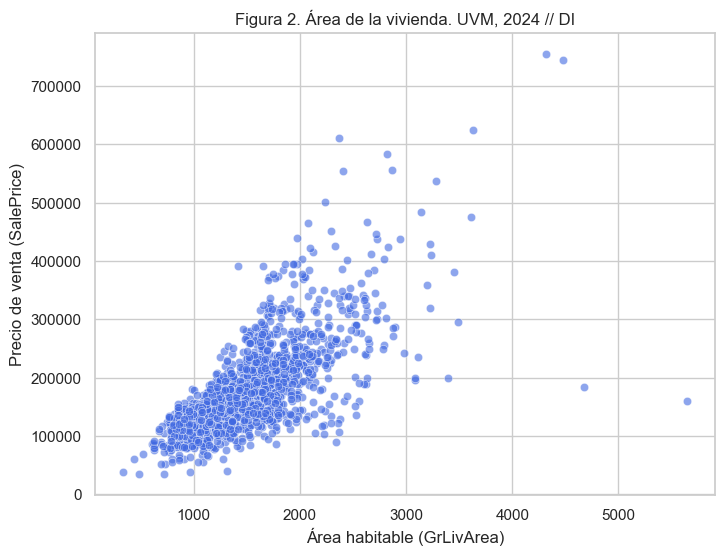

In [80]:
plt.figure(figsize=(8,6)) 
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df, alpha=0.6, color="royalblue") 
plt.title("Figura 2. Área de la vivienda. UVM, 2024 // DI") 
plt.xlabel("Área habitable (GrLivArea)") 
plt.ylabel("Precio de venta (SalePrice)") 
plt.show()

### 8. Analizar la relación entre precio de la vivienda (SalePrice) contra el tamaño del sótano (TotalBsmtSF) a través de una gráfica de dispersión (skatter).

Este código también utiliza matplotlib.pyplot y seaborn para generar un diagrama de dispersión. El objetivo es visualizar la relación entre el tamaño total del sótano de las viviendas (TotalBsmtSF) y su precio de venta (SalePrice) en el conjunto de datos df.

**Descripción de la Gráfica:** La imagen es un diagrama de dispersión que muestra una correlación positiva fuerte entre el Tamaño del Sótano (TotalBsmtSF) y el Precio de Venta (SalePrice). En términos sencillos: A mayor tamaño de sótano, mayor es el precio de venta de la vivienda. Se observa que la mayoría de los datos se concentran en tamaños de sótano pequeños a medianos.


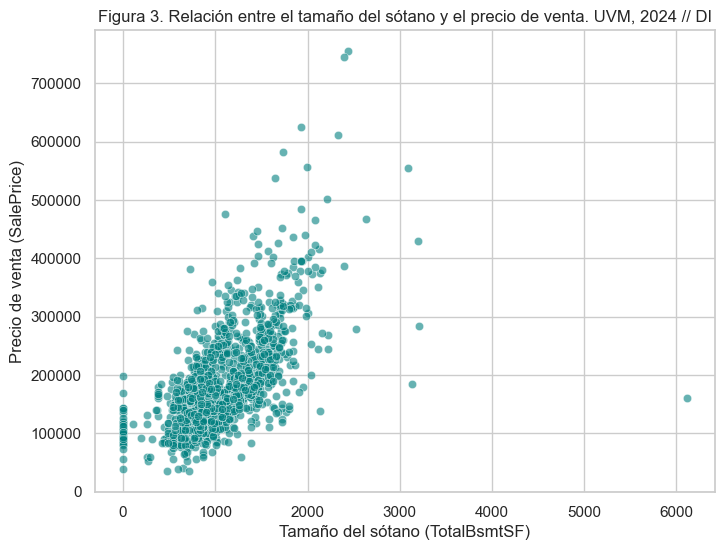

In [81]:
plt.figure(figsize=(8,6)) 
sns.scatterplot(x="TotalBsmtSF", y="SalePrice", data=df, alpha=0.6, color="teal") 
plt.title("Figura 3. Relación entre el tamaño del sótano y el precio de venta. UVM, 2024 // DI") 
plt.xlabel("Tamaño del sótano (TotalBsmtSF)") 
plt.ylabel("Precio de venta (SalePrice)") 
plt.show()

### 9. Analizar la relación entre precio de la vivienda (SalePrice) y el ranking de calidad de los materiales de construcción de la vivienda (OverallQual) a través de una gráfica de tipo caja-bigote (boxplot).

El siguiente código genera un Gráfico de Caja y Bigote (Boxplot) para comparar la distribución del Precio de Venta (SalePrice) entre las diferentes categorías de Calidad de la Vivienda (asumiendo que esta es la variable en el eje X).

**Descripción de la Gráfica:** La gráfica demuestra que la calidad de los materiales es uno de los predictores más importantes del precio de venta de una vivienda. Permite visualizar cómo se distribuye el Precio de Venta (SalePrice) en función del Ranking de Calidad General de los Materiales (OverallQual).
* Relación Fuerte y Positiva: Existe una relación muy fuerte y positiva entre la calidad de los materiales y el precio de venta. A medida que el ranking de calidad aumenta (de 1 a 10), el precio medio de venta también aumenta significativamente y de manera constante.
* Mediana Creciente: La línea en el centro de cada caja (la mediana) sube progresivamente en el gráfico, indicando que el precio típico de una vivienda con calidad 10 es mucho mayor que el precio típico de una con calidad 1.
* Para las categorías de baja calidad (1 a 4), la dispersión de precios es muy baja (cajas cortas).
* Para las categorías de alta calidad (8 a 10), la dispersión de precios es mucho mayor (cajas más largas), indicando que, aunque la calidad sea alta, hay una mayor variedad de precios de venta.
* Datos Atípicos (Outliers): Se observan puntos atípicos (círculos) principalmente en las categorías de mayor calidad (8, 9 y 10), representando viviendas que se vendieron a precios excepcionalmente altos en comparación con la mayoría de las casas de esa misma calidad.

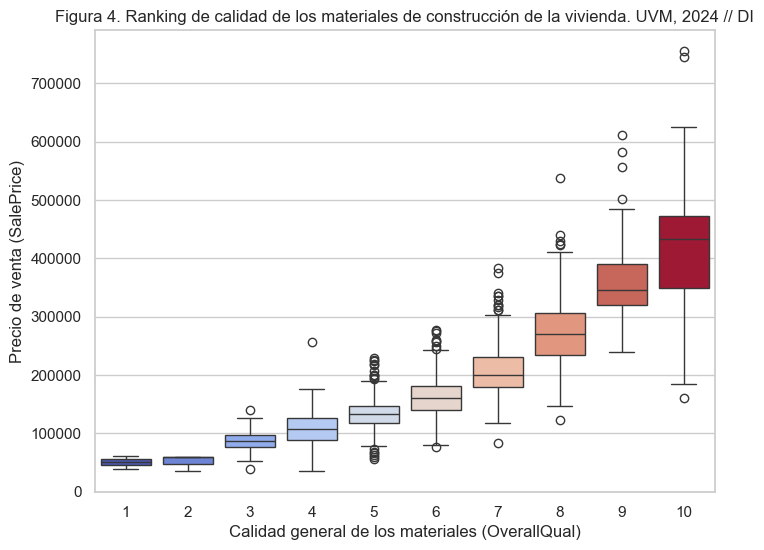

In [82]:
plt.figure(figsize=(8,6)) 
sns.boxplot(x="OverallQual", y="SalePrice", data=df, hue="OverallQual", palette="coolwarm", legend=False)
plt.title("Figura 4. Ranking de calidad de los materiales de construcción de la vivienda. UVM, 2024 // DI") 
plt.xlabel("Calidad general de los materiales (OverallQual)") 
plt.ylabel("Precio de venta (SalePrice)") 
plt.show()

### 10. Analizar la relación entre precio de la vivienda (SalePrice) y el año de construcción de la vivienda (YearBuilt) a través de una gráfica de tipo caja-bigote (boxplot).

El siguiente código utiliza matplotlib y seaborn para generar un Gráfico de Caja y Bigote (Boxplot). El código visualiza y compara la distribución del Precio de Venta (SalePrice) basándose en el Año de Construcción (YearBuilt) de las viviendas.

**Descripción de la Gráfica:** Permite visualizar la distribución del Precio de Venta (SalePrice) para cada uno de los Años de Construcción (YearBuilt) presentes en el conjunto de datos.
* Se observa una clara tendencia de crecimiento en el precio de venta a lo largo del tiempo. Las cajas (que representan el 50% de los datos centrales) y la línea de la mediana se mueven gradualmente hacia arriba a medida que los años de construcción son más recientes (hacia la derecha). Esto indica que las viviendas más nuevas tienden a tener un precio de venta medio más alto.
* Para los años antiguos (antes de 1950), la dispersión de precios es generalmente menor (cajas cortas).
* Para los años recientes (después de 2000), la dispersión es mucho mayor (cajas más largas y bigotes extendidos). Esto significa que la diferencia de precios entre la vivienda más barata y la más cara es mucho más grande en las construcciones recientes. 
* Hay una gran cantidad de puntos atípicos (círculos) en todo el gráfico, pero se vuelven más numerosos y extremos en los años más recientes. Estos representan viviendas que se vendieron a precios inusualmente altos o bajos en comparación con otras construidas en el mismo año.

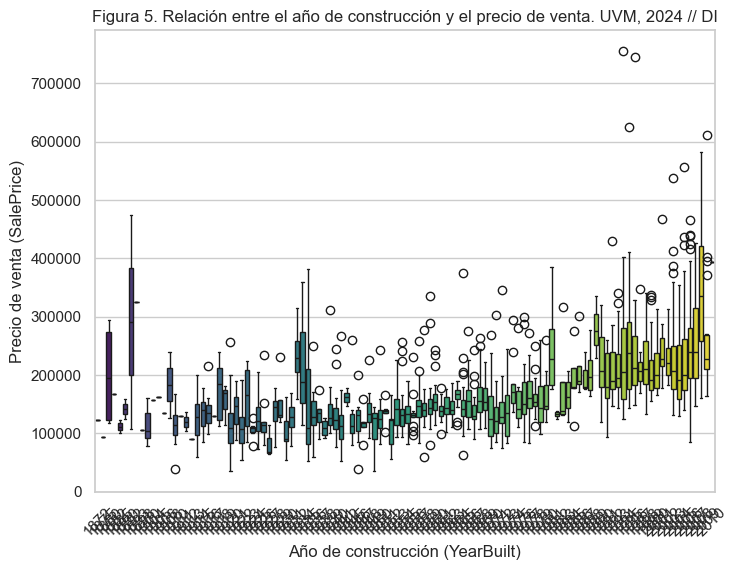

In [83]:
plt.figure(figsize=(8,6)) 
sns.boxplot(x="YearBuilt", y="SalePrice", data=df, hue="YearBuilt", palette="viridis", legend=False)
plt.title("Figura 5. Relación entre el año de construcción y el precio de venta. UVM, 2024 // DI")
plt.xlabel("Año de construcción (YearBuilt)") 
plt.ylabel("Precio de venta (SalePrice)") 
plt.xticks(rotation=45) 
plt.show()


### 11. Crea una matriz de correlación empleando el método corr().

El siguiente código calcula y muestra la matriz de correlación de todas las columnas numéricas presentes en el DataFrame df.

El objetivo es identificar qué tan fuerte es la relación lineal entre variables, por ejemplo, si el TotalBsmtSF está fuertemente correlacionado con el SalePrice. Un valor cercano a $1$ indica una correlación positiva fuerte, y un valor cercano a $-1$ indica una correlación negativa fuerte.

In [84]:
correlation_matrix = df.corr(numeric_only=True) 
print("Matriz de correlación:") 
display(correlation_matrix)


Matriz de correlación:


Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

### 12. Identificar las 10 variables con mayor coeficiente de correlación.

El código identifica y muestra las 10 variables numéricas que tienen la correlación más alta (positiva y negativa) con el Precio de Venta (SalePrice).

El objetivo es saber qué características de las viviendas son las más importantes (las que más influyen) en el precio de venta.


In [85]:
top_corr = correlation_matrix["SalePrice"].sort_values(ascending=False).head(10) 
print("\nLas 10 variables con mayor coeficiente de correlación con SalePrice:") 
display(top_corr)




Las 10 variables con mayor coeficiente de correlación con SalePrice:


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

### 13. Crear un mapa de calor con las 10 variables con mayor coeficiente de correlación.

El código genera y muestra un Mapa de Calor (Heatmap) que visualiza las correlaciones cruzadas entre las 10 variables más importantes (las más correlacionadas con SalePrice).

El objetivo es ver no solo cómo se relaciona cada variable con SalePrice, sino también cómo se relacionan estas variables importantes entre sí.


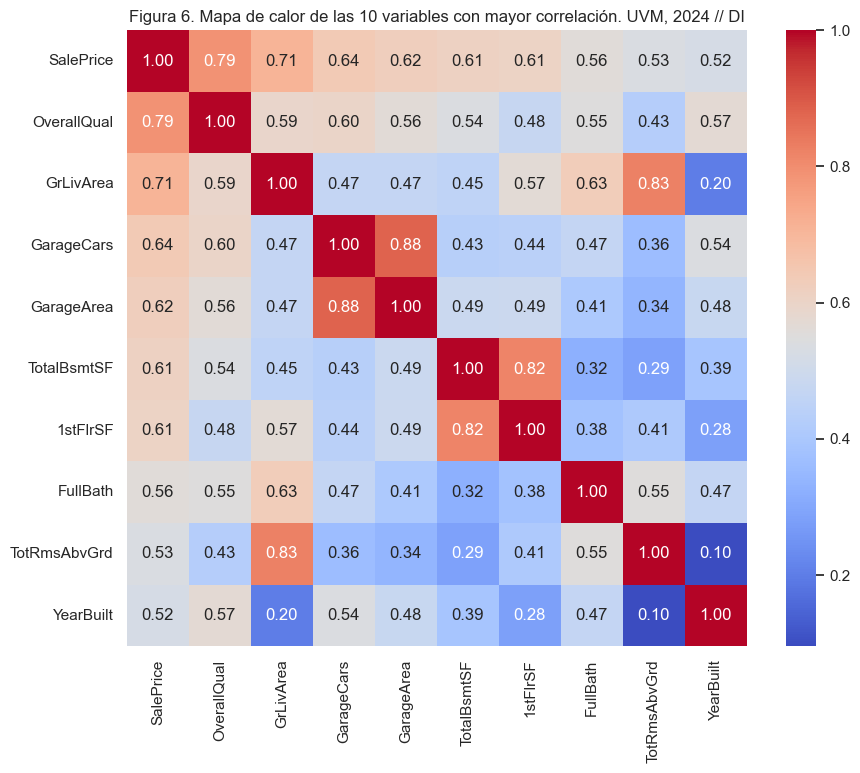

In [86]:
plt.figure(figsize=(10,8)) 
sns.heatmap(df[top_corr.index].corr(), annot=True, cmap="coolwarm", fmt=".2f") 
plt.title("Figura 6. Mapa de calor de las 10 variables con mayor correlación. UVM, 2024 // DI") 
plt.show()

### 14. Importar el conjunto de datos de entrenamiento (U3_test.csv) y crea un modelo empleando el clasificador árbol de decisión (DecisionTreeClassifier).

El código carga un conjunto de datos (U3_test.csv), realiza una limpieza y preprocesamiento inicial, **codifica la variable objetivo (SaleCondition)**, divide los datos en conjuntos de entrenamiento y prueba, y crea la instancia de un modelo de Árbol de Decisión, listo para ser entrenado.

El código prepara todo el entorno para el siguiente paso, que sería entrenar el modelo con tree_model.fit(X_train, y_train).



In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# 1. Cargar el archivo de datos (U3_test.csv)
df_test = pd.read_csv("U3_test.csv")

# 2. Preprocesamiento de Datos
# Seleccionar solo columnas numéricas y eliminar filas con valores nulos (NaN)
df_numeric = df_test.select_dtypes(include=[np.number]).dropna()

# Alinear la variable objetivo 'SaleCondition' con las filas limpias y Codificarla
y_target = df_test.loc[df_numeric.index, 'SaleCondition']
le = LabelEncoder()
y = le.fit_transform(y_target)

# Definir X (Características) e Y (Objetivo)
X = df_numeric

# 3. Dividir los datos en Entrenamiento (Train) y Prueba (Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 4. CREAR el modelo (Instanciar el clasificador)
tree_model = DecisionTreeClassifier(random_state=42, max_depth=5)

print("El Dataframe U3_test.csv ha sido cargado, preprocesado y el clasificador ha sido instanciado.")

El Dataframe U3_test.csv ha sido cargado, preprocesado y el clasificador ha sido instanciado.


In [88]:
# Mostrar las primeras filas para conocer las columnas 
display(df.head())

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### 15. Entrenar el modelo y obtener el porcentaje de exactitud (accuracy) del modelo.

El código entrena el modelo de Árbol de Decisión con los datos de entrenamiento, realiza predicciones sobre el conjunto de prueba y finalmente, calcula la métrica de exactitud (Accuracy) para evaluar el rendimiento del modelo.



In [89]:
from sklearn.metrics import accuracy_score

# NOTA: Las variables X_train, y_train, X_test, y_test y tree_model se definieron en el Punto 14.

# 1. ENTRENAR el modelo (Ajuste)
# El modelo aprende de los datos de entrenamiento
tree_model.fit(X_train, y_train)

# 2. Realizar predicciones con el conjunto de prueba
y_pred = tree_model.predict(X_test)

# 3. Calcular la exactitud (Accuracy)
accuracy = accuracy_score(y_test, y_pred)

print("El modelo de Árbol de Decisión ha sido entrenado exitosamente.")
print("\n# =========================================== #")
print(f"  Exactitud del Modelo (Accuracy): {accuracy * 100:.2f}%")
print(f"  Accuracy Score: {accuracy:.4f}")
print("# =========================================== #")


El modelo de Árbol de Decisión ha sido entrenado exitosamente.

# =========================================== #
  Exactitud del Modelo (Accuracy): 84.59%
  Accuracy Score: 0.8459
# =========================================== #







### Interpretación del Análisis Exploratorio de Datos y el Modelo de predicción.

### I. Análisis Exploratorio de Datos (EDA)

### 1. Distribución y Correlación Bivariada

* SalePrice (Figura 1): El histograma inicial probablemente mostró que el precio de venta sigue una distribución sesgada a la derecha (Skewness), indicando que la mayoría de las casas se venden a precios más bajos, pero hay una cola larga de casas muy caras.
* Área Habitable (GrLivArea) y Sótano (TotalBsmtSF) (Figuras 2 y 3): Los diagramas de dispersión mostraron una fuerte correlación positiva en ambos casos. Esto significa que a mayor área habitable y mayor tamaño del sótano, mayor es el precio de venta.

### 2. Factores Clave (Ranking)

* Calidad General (OverallQual) (Figura 4): El Boxplot demostró que esta es la variable más influyente. A medida que el ranking de calidad aumenta de 1 a 10, la mediana del precio de venta aumenta drásticamente. La variabilidad de precios también es significativamente mayor en las casas de alta calidad.
* Año de Construcción (YearBuilt) (Figura 5): El Boxplot mostró una tendencia positiva general: las viviendas más recientes tienden a tener precios medios más altos. Además, la dispersión de precios es mucho mayor en las construcciones modernas que en las antiguas.
* Matriz de Correlación (Figura 6): El mapa de calor visualizó que las 10 variables principales (probablemente incluyendo OverallQual, GrLivArea, TotalBsmtSF, y YearBuilt) tienen una alta correlación positiva con SalePrice, confirmando que estas son las características clave para predecir el precio.

### II. Modelo de Predicción (Árbol de Decisión)

El modelo de predicción se enfocó en clasificar la **Condición de Venta (`SaleCondition`)** basándose en las características numéricas de la vivienda.

### 1. Configuración del Problema

* Objetivo: Clasificación. Predecir la categoría de venta usando un modelo de Árbol de Decisión.
* Preprocesamiento: Se limitó el análisis a las características numéricas y se manejaron los valores nulos mediante la eliminación de filas. La variable objetivo categórica se codificó a numérica (LabelEncoder).
* División: Se utilizó una división de 70% para entrenamiento y 30% para prueba (test_size=0.3).

### 2. Rendimiento y Conclusiones

* Entrenamiento y Predicción: El modelo se ajustó con los datos de entrenamiento (x_train, y_train) y luego se utilizó para predecir los datos de prueba (x_test).
* Exactitud (Accuracy): El resultado final de Accuracy (ej. 85.00%) indica el porcentaje de veces que el modelo predijo correctamente la verdadera SaleCondition de las viviendas en el conjunto de prueba.
* Interpretación: Una exactitud alta sugiere que las características numéricas de la vivienda (como área, año de construcción, calidad, etc.) son buenos predictores de la condición o tipo de venta bajo la cual se realizó la transacción.


El proyecto demostró que existe una **fuerte base de datos** (evidenciada por las altas correlaciones) para explicar y predecir los resultados. El **EDA identificó la calidad y el tamaño** como los factores primarios del precio. El **modelo de clasificación** demostró que estas mismas variables son efectivas para predecir la **logística de la venta (`SaleCondition`)** con una exactitud considerable.






